In [2]:
import numpy as np 
from random import random
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd

In [5]:
dim = 20
num = dim**2
repeticiones=50

In [3]:
def paso(pos):
    fila = pos // dim
    columna = pos % dim
    vecindad = actual[max(0, fila - 1):min(dim, fila + 2),
                      max(0, columna - 1):min(dim, columna + 2)]
    return 1 * (np.sum(vecindad) - actual[fila, columna] == 3)

In [34]:
#Mayor colapso poblacional
a=[]
for prob in range(20):
    mayor_colapso=[]
    for repeticion in range(repeticiones):
        valores = [1*(random()<(prob+1)/20) for i in range(num)]
        actual = np.reshape(valores, (dim, dim))
        vivos=[]
        colapso=[]
        for iteracion in range(8):
            valores = [paso(x) for x in range(num)]
            vivos.append(sum(valores))
            if iteracion!=0:
                colapso.append(vivos[iteracion-1]-vivos[iteracion])
            actual = np.reshape(valores, (dim, dim))    
        mayor_colapso.append(max(colapso))
    a.append(mayor_colapso)

mc=pd.DataFrame(a)
mc.index = ['prob 0.05','prob 0.1', 'prob 0.15','prob 0.2','prob 0.25', 'prob 0.3','prob 0.35','prob 0.4', 'prob 0.45','prob 0.5','prob 0.55','prob 0.6','prob 0.65','prob 0.7','prob 0.75','prob 0.8','prob 0.85','prob 0.9','prob 0.95','prob 1']
mc.columns = [i+1 for i in range (repeticiones)]
mc

,1,2,3,4,5,6,7,8,9,10,...,41,42,43,44,45,46,47,48,49,50
prob 0.5,2,1,3,4,2,1,3,0,2,1,...,0,1,0,2,3,1,2,0,1,2
prob 0.1,10,4,6,12,12,6,11,8,11,9,...,17,5,18,14,7,8,7,16,12,9
prob 0.15,14,10,11,14,20,15,10,30,13,8,...,16,10,16,11,19,7,17,22,6,10
prob 0.2,25,22,22,14,20,16,21,13,17,24,...,16,20,24,19,16,21,21,21,21,23
prob 0.25,28,20,40,21,26,23,30,25,41,29,...,25,26,21,26,23,24,24,27,35,29
prob 0.3,22,30,34,41,33,31,27,35,26,26,...,51,25,28,30,27,31,36,25,16,25
prob 0.35,23,36,41,41,35,36,34,30,35,22,...,33,52,29,41,22,33,24,26,29,23
prob 0.4,45,36,28,34,18,42,30,36,50,27,...,42,28,25,37,36,37,24,37,28,28
prob 0.45,32,32,33,40,30,37,38,30,43,28,...,25,19,28,46,30,40,38,30,32,26
prob 0.5,24,30,28,27,48,27,36,30,43,31,...,29,38,26,25,30,26,38,30,22,30


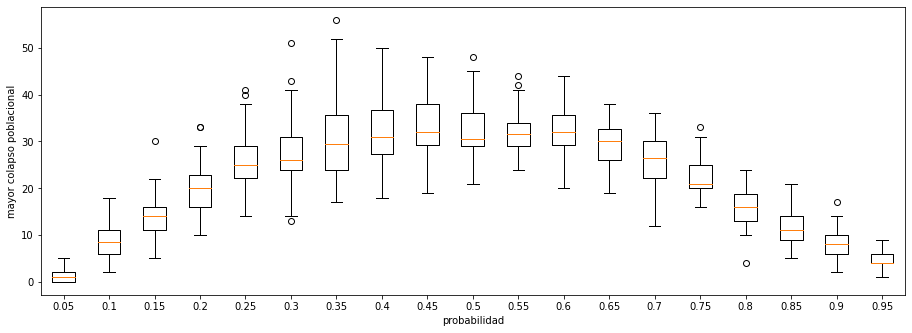

In [44]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,1])
bp = ax.boxplot([mc.iloc[0],mc.iloc[1],mc.iloc[2],mc.iloc[3],mc.iloc[4],mc.iloc[5],mc.iloc[6],mc.iloc[7],mc.iloc[8],mc.iloc[9],mc.iloc[10],mc.iloc[11],mc.iloc[12],mc.iloc[13],mc.iloc[14],mc.iloc[15],mc.iloc[16],mc.iloc[17],mc.iloc[18]])
plt.xlabel('probabilidad')
plt.xticks([1, 2, 3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19], [0.05,0.10,0.15,0.20,0.25,0.30,0.35,0.40,0.45,0.50,0.55,0.60,0.65,0.70,0.75,0.80,0.85,0.90,0.95])
plt.ylabel('mayor colapso poblacional')
plt.savefig('plot.png', dpi=300, bbox_inches='tight')